## Clustering

In [27]:
import pandas as pd

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import pandas as pd

In [29]:
data = pd.read_csv("/Users/tanjamarkotic/Desktop/DMML2019_Team_Swatch/data/DataWithLocationCleaned.csv.gz")




In [30]:
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)"


In [31]:
data['position']=data['position'].str.replace(" ", "").str.strip('(').str.strip(')')
data['latitude']=data['position'].str.split(',').str[0].str.split('.').str[0]
data['longitude']=data['position'].str.split(',').str[1].str.split('.').str[0]

print(data[['latitude','longitude']])

       latitude longitude
0            48       -95
1            48       -95
2            48       -95
3            48       -95
4            48       -95
5            48       -95
6            48       -95
7            48       -95
8            48       -95
9            48       -95
10           48       -95
11           48       -95
12           48       -95
13           48       -95
14           42       -83
15           42       -83
16           42       -83
17           29      -100
18           29      -100
19           29      -100
20           48      -122
21           48      -122
22           48      -122
23           48      -122
24           48      -122
25           48      -122
26           48      -122
27           48      -122
28           48      -122
29           48      -122
...         ...       ...
349142       32      -117
349143       31      -106
349144       48      -100
349145       46       -84
349146       48      -101
349147       48      -101
349148      

In [32]:
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,latitude,longitude
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"48.905266,-95.314404",48,-95
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"48.905266,-95.314404",48,-95
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"48.905266,-95.314404",48,-95
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"48.905266,-95.314404",48,-95
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"48.905266,-95.314404",48,-95


In [33]:
data.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
Year          int64
Month         int64
position     object
latitude     object
longitude    object
dtype: object

In [34]:
data['latitude'].unique()

array(['48', '42', '29', '44', '45', '31', '26', '27', '28', '25', '41',
       '43', 'InternationalFalls', '47', '62', 'PleasantCamp', '55', '59',
       '32', "'48", '46', "'44", '35'], dtype=object)

In [35]:
data['latitude'] = data['latitude'].replace(['InternationalFalls'], 48)
data['latitude'] = data['latitude'].replace(['PleasantCamp'], 59)
data['latitude'] = data['latitude'].replace("\'48", '48')
data['latitude'] = data['latitude'].replace("\'44", '44')

In [36]:
data['latitude'].unique()

array(['48', '42', '29', '44', '45', '31', '26', '27', '28', '25', '41',
       '43', 48, '47', '62', 59, '55', '59', '32', '46', '35'],
      dtype=object)

In [37]:
data['longitude'].unique()

array(['-95', '-83', '-100', '-122', '-123', '-119', '-117', '-118',
       '-72', '-71', '-73', '-106', '-99', '-98', '-97', '-104', '-102',
       '-82', '-74', '-75', '-76', '-78', '-107', '-101', '-96',
       'KoochichingCounty', '-89', '-141', 'Skagway', '-131', '-135',
       '-109', '-112', '-110', '-114', '-111', '-115', '-116', "'-116",
       '-67', "'-66", '-68', '-70', '-84', '-94', '-103', '-108', '-105'],
      dtype=object)

In [38]:
data['longitude'] = data['longitude'].replace('KoochichingCounty', '-93')
data['longitude'] = data['longitude'].replace('Skagway', '-136')

# A contôler!!
data['longitude'] = data['longitude'].replace('\'-116', '-116')
data['longitude'] = data['longitude'].replace('\'-66', '-66')

In [39]:
data['longitude'].unique()

array(['-95', '-83', '-100', '-122', '-123', '-119', '-117', '-118',
       '-72', '-71', '-73', '-106', '-99', '-98', '-97', '-104', '-102',
       '-82', '-74', '-75', '-76', '-78', '-107', '-101', '-96', '-93',
       '-89', '-141', '-136', '-131', '-135', '-109', '-112', '-110',
       '-114', '-111', '-115', '-116', '-67', '-66', '-68', '-70', '-84',
       '-94', '-103', '-108', '-105'], dtype=object)

In [40]:
# 'InternationalFalls': 48.6011, -93.4110
# 'PleasantCamp': 59.452331524 -136.358665232

In [41]:
data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])
data.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
Year          int64
Month         int64
position     object
latitude      int64
longitude     int64
dtype: object

In [42]:
data = data[['latitude','longitude']]
data.shape

(349172, 2)

In [43]:
data = np.array(data)

In [44]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    num_samples, num_feature = data.shape
    return data[np.random.choice(num_samples, k)]

In [45]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    distance_list = []
    num_cluster, _ = mu.shape
    for k_th in range(num_cluster):
        sum_squares = np.sum(np.square(data - mu[k_th, :]), axis=1)
        distance_list.append(sum_squares)
    return np.array(distance_list).T

In [46]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    _, num_features = data.shape
    num_clusters, _ = mu_old.shape
    distance_matrix = build_distance_matrix(data, mu_old)
    losses = np.min(distance_matrix, axis=1)
    assignments = np.argmin(distance_matrix, axis=1)

    # update the mu
    mu = np.empty((num_clusters, num_features))
    for k_th in range(num_clusters):
        rows = np.where(assignments == k_th)
        mu[k_th, :] = np.mean(np.squeeze(data[rows, :]), axis=0)
    return losses, assignments, np.nan_to_num(mu)

In [47]:
initialize_clusters(data, 5)

array([[  48, -103],
       [  48,  -95],
       [  59, -136],
       [  47,  -67],
       [  29, -100]])

In [48]:
!pip install helper

In [49]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


The current iteration of k-means is: 0,                the average loss is 33983.76726942595.


ValueError: x and y must have same first dimension, but have shapes (349172, 2) and (2, 2)

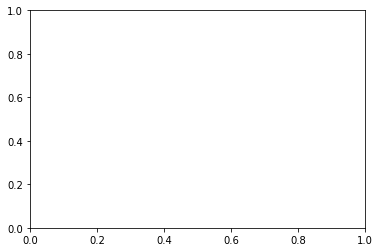

In [53]:
#from helper import build_dir
import helper
import plot
import os

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = np.array([[5, 80], [3, 90]]) # let's initialize the cluster centers manually
    #initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iteration, l=average_loss))
        # check converge
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plt.plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
#helper.build_dir(output_figure)
os.mkdir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

In [44]:
np.random.seed(5)

In [45]:
X = data['latitude']
y = data['longitude']


In [46]:
from sklearn import preprocessing
X = preprocessing.scale(X)
y = preprocessing.scale(y)

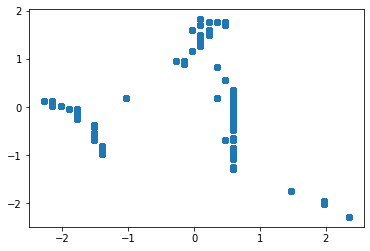

In [47]:

plt.plot(X, y, 'o')

In [28]:
estimators = [(KMeans(n_clusters=8)),
              ( KMeans(n_clusters=3))]

In [48]:
titles = ['8 clusters', '3 clusters']
for i, (name, est) in enumerate(estimators):
    plt.figure(figsize=(6, 4))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    plt.scatter(X[:, 0], X[:, 1],
               c=labels.astype(np.float), edgecolor='k')

   

TypeError: cannot unpack non-iterable KMeans object